In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from collections import Counter
from nltk import ngrams  # für n-grams
import itertools

In [2]:
file_path_processed = "..\..\data/processed/df_recipes.pkl"
file_path_raw = "..\..\data/raw/Recipes1000.CSV"
file_path_stopwords = "../../data/processed/stopword_generation/df_custom_stopwords.pkl"

In [3]:
df = pd.read_csv(file_path_raw)
df

,Unnamed: 0,name,description,ingredients,steps
0,3945,avocado and lump crab salad,this stuffed avocado and lump crab salad is li...,"1 medium hass avocado, 4 oz lump crab meat, 2 ...","in a medium bowl, combine onion, lime juice, c..."
1,50,chicken sausage and peppers macaroni casserole,"chicken sausage, bell peppers, onions and mush...","14 ounces chicken sausage, 1 tbsp olive oil, 1...",preheat oven to 350degf . in a large deep non ...
2,5708,southern style pork stir fry,southern style pork stir fry with pork tenderl...,"1.0 pound pork tenderloin, 2.0 teaspoon vegeta...",cut tenderloin into 1/4 inch slices . in wok o...
3,3595,low carb garlic mustard baked ham,whether you're watching your carb intake or no...,"1.0 spiral sliced bone in ham, 0.5 cup mustard...",set a rack to the lowest position in the oven ...
4,4742,brownie ice cream pizza,"brownie ice cream pizza with brownie mix, skip...","15.5 ounce brownie mix, 0.5 cup skippy creamy ...",preheat oven to 350deg . spray 12 inch pizza p...
...,...,...,...,...,...
995,5869,asian lime dressing,"when making dressing from scratch, the knife p...","0.3 cup lime juice, 1.5 tablespoon soy sauce, ...","add the lime juice, soy sauce, vinegar, sesame..."
996,357,crock pot pasta sauce with sausage,crock pot pasta sauce with sausage lazy pasta ...,"1 lb lean chicken italian sausage, 1 tsp extra...","brown the sausage in a large skillet, breaking..."
997,5432,persian lamb stew,recipe for a simple persian lamb stew with mea...,"1 tbsp turmeric, 1 tsp black pepper, 1 tsp sal...","in a small dish, mix together turmeric, black ..."
998,1359,simple roasted butternut squash,the easiest way to enjoy fall's harvest.,"1.0 bag butternut squash, 1.0 tablespoon grape...",preheat the oven to 400degf . line a sheet pan...


In [4]:
df = pd.read_pickle("../../data/processed/df_recipes_no_stopwords.pkl")
df

,Unnamed: 0,name,description,ingredients,steps,english,preprocessed_name,token_tag_name,preprocessed_description,token_tag_description,preprocessed_ingredients,token_tag_ingredients,preprocessed_steps,token_tag_steps
0,3945,avocado and lump crab salad,this stuffed avocado and lump crab salad is li...,"1 medium hass avocado, 4 oz lump crab meat, 2 ...","in a medium bowl, combine onion, lime juice, c...",True,"[AVOCADO, LUMP, CRAB, SALAD]","[(AVOCADO, NN), (AND, CC), (LUMP, NN), (CRAB, ...","[STUFFED, AVOCADO, LUMP, CRAB, SALAD, MADE, LI...","[(THIS, DT), (STUFFED, NN), (AVOCADO, NN), (AN...","[AVOCADO, LUMP, CRAB, LIME, GRAPE, LETTUCE]","[(MEDIUM, NN), (AVOCADO, VBZ), (LUMP, JJ), (CR...","[BOWL, COMBINE, LIME, TOMATO, CRAB, GENTLY, TO...","[(IN, IN), (A, DT), (MEDIUM, NN), (BOWL, NN), ..."
1,50,chicken sausage and peppers macaroni casserole,"chicken sausage, bell peppers, onions and mush...","14 ounces chicken sausage, 1 tbsp olive oil, 1...",preheat oven to 350degf . in a large deep non ...,True,"[SAUSAGE, MACARONI, CASSEROLE]","[(CHICKEN, VBN), (SAUSAGE, NN), (AND, CC), (MA...","[SAUSAGE, BAKED, CASSEROLE, WHEAT, MACARONI, T...","[(CHICKEN, JJ), (SAUSAGE, NN), (BELL, NN), (AN...","[SAUSAGE, GARLIC, PETITE, SEASONING, THYME, CH...","[(CHICKEN, JJ), (SAUSAGE, NN), (OLIVE, JJ), (O...","[PREHEAT, DEEP, SKILLET, SAUSAGE, HIGH, HEAT, ...","[(PREHEAT, NN), (OVEN, MD), (TO, TO), (IN, IN)..."
2,5708,southern style pork stir fry,southern style pork stir fry with pork tenderl...,"1.0 pound pork tenderloin, 2.0 teaspoon vegeta...",cut tenderloin into 1/4 inch slices . in wok o...,True,"[PORK, STIR, FRY]","[(SOUTHERN, JJ), (STYLE, NN), (PORK, NN), (STI...","[PORK, STIR, FRY, PORK, TENDERLOIN, VEGETABLE,...","[(SOUTHERN, JJ), (STYLE, NN), (PORK, NN), (STI...","[PORK, TENDERLOIN, VEGETABLE, POTATO, CORNSTAR...","[(POUND, NN), (PORK, NN), (TENDERLOIN, NN), (T...","[TENDERLOIN, PAN, STIR, FRY, PORK, PORK, PLATT...","[(CUT, NN), (TENDERLOIN, NN), (INTO, IN), (INC..."
3,3595,low carb garlic mustard baked ham,whether you're watching your carb intake or no...,"1.0 spiral sliced bone in ham, 0.5 cup mustard...",set a rack to the lowest position in the oven ...,True,"[GARLIC, MUSTARD, BAKED, HAM]","[(LOW, JJ), (GARLIC, JJ), (MUSTARD, NN), (BAKE...","[WHETHER, WATCHING, INTAKE, SAVORY, BAKED, HAM]","[(WHETHER, IN), (WATCHING, VBG), (YOUR, PRP$),...","[SPIRAL, BONE, HAM, MUSTARD, SALTED, HONEY, GA...","[(SPIRAL, NN), (SLICED, VBD), (BONE, NN), (IN,...","[RACK, POSITION, PREHEAT, LINE, ROASTING, PAN,...","[(SET, VB), (A, DT), (RACK, NN), (TO, TO), (TH..."
4,4742,brownie ice cream pizza,"brownie ice cream pizza with brownie mix, skip...","15.5 ounce brownie mix, 0.5 cup skippy creamy ...",preheat oven to 350deg . spray 12 inch pizza p...,True,"[BROWNIE, ICE, PIZZA]","[(BROWNIE, NN), (ICE, NN), (CREAM, NN), (PIZZA...","[BROWNIE, ICE, PIZZA, BROWNIE, SKIPPY, CREAMY,...","[(BROWNIE, NN), (ICE, NN), (CREAM, NN), (PIZZA...","[BROWNIE, SKIPPY, CREAMY, PEANUT, VANILLA, ICE...","[(OUNCE, NN), (BROWNIE, NN), (MIX, JJ), (CUP, ...","[PREHEAT, PIZZA, PAN, ASIDE, PREPARE, BROWNIE,...","[(PREHEAT, NN), (OVEN, RB), (TO, TO), (SPRAY, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5869,asian lime dressing,"when making dressing from scratch, the knife p...","0.3 cup lime juice, 1.5 tablespoon soy sauce, ...","add the lime juice, soy sauce, vinegar, sesame...",True,"[LIME, DRESSING]","[(LIME, NN), (DRESSING, VBG)]","[DRESSING, SCRATCH, PREP, BLENDER, PREP, GO, A...","[(WHEN, WRB), (MAKING, VBG), (DRESSING, VBG), ...","[LIME, SOY, RICE, WINE, VINEGAR, SESAME, HONEY...","[(CUP, NN), (LIME, NN), (JUICE, NN), (TABLESPO...","[LIME, SOY, VINEGAR, SESAME, HONEY, FISH, GING...","[(ADD, VB), (THE, DT), (LIME, JJ), (JUICE, NN)..."
882,357,crock pot pasta sauce with sausage,crock pot pasta sauce with sausage lazy pasta ...,"1 lb lean chicken italian sausage, 1 tsp extra...","brown the sausage in a large skillet, breaking...",True,"[CROCK, POT, SAUSAGE]","[(CRO

# Data Exploration

## Preprocessing

The dataset is about recipes.

It has 1000 observations.

All the features except the unnamed index are textual:
- name (title of the recipe)
- description (short description of the result)
- ingredients (list of ingredients)
- steps (cooking instructions)

A summary statistic on the raw data doesn't make sense, as there are only textual variables.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,886.0,2984.31377,1796.724108,21.0,1397.5,2870.0,4567.25,6103.0


There are no obvious empty fields in the dataset

In [6]:
df.isna().sum()

Unnamed: 0                  0
name                        0
description                 0
ingredients                 0
steps                       0
english                     0
preprocessed_name           0
token_tag_name              0
preprocessed_description    0
token_tag_description       0
preprocessed_ingredients    0
token_tag_ingredients       0
preprocessed_steps          0
token_tag_steps             0
dtype: int64

To be able to work with the dataset, we first need to preprocess the textual features.

Therefore we do multiple steps:
- **keep_only_words**
  - Removes all occurrences of python punctuation characters: ```!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~```
- **tokenize_to_list**
  - Use `word_tokenize` from the nltk.tokenize package. This tokenizes a text into a list of words.
  - Returns a tokenized copy of *text*, using NLTK's recommended word tokenizer NLTKWordTokenizer, currently an improved `TreebankWordTokenizer` along with `PunktSentenceTokenizer` for the specified language
- **filter_language**
  - Keep only english words
- **token_and_tag_to_list**
  - Use `pos_tag` from the nltk.tag package to tag words
  - Noun (NN) or proper noun (NNP), Verb (VB), Adjective (JJ), Adverb (RB), Pronoun (PRP), Preposition (IN), Conjunction (CC), Interjection (UH)
- **lemmatize_to_list**
  - Use `WordNetLemmatizer` to lemmatize a word, reducing the words to their base or root form. 
- **non_stopword_token_to_list**
  - Drop all english stopwords like, for example, pronouns ('i', 'you', 'he', 'she', 'it', etc.), articles ('a', 'an', 'the') and conjunctions ('and', 'but', 'or')
- **stemmed_token_to_list**
  - Use the `PorterStemmer` to stem the word, reducing the words to their base or root form. 
- **upper_tokens_to_list**
  - Convert all words to upper case

## TODOs and Questions
-  Does it make sense to Lemmatize AND stem?
-  lemmatize(token) - try add :param pos:
-  nltk.pos_tag(upper_tokens) - try use pos_tag_sents()
-  use n_grams
-  drop non-NNs from ingredients list?
-  make groups of NN/VB in steps
-  what does 'combination' mean in the questions? is it really 2-word-combinations?

After all those operations, we get this result

In [7]:
df = pd.read_pickle("..\..\data/processed/df_recipes_no_stopwords.pkl")
df['preprocessed_name']

0        [AVOCADO, LUMP, CRAB, SALAD]
1      [SAUSAGE, MACARONI, CASSEROLE]
2                   [PORK, STIR, FRY]
3       [GARLIC, MUSTARD, BAKED, HAM]
4               [BROWNIE, ICE, PIZZA]
                    ...              
881                  [LIME, DRESSING]
882             [CROCK, POT, SAUSAGE]
883                            [STEW]
884               [SIMPLE, BUTTERNUT]
885                      [NUT, FRUIT]
Name: preprocessed_name, Length: 886, dtype: object

In [8]:
df = pd.read_pickle(file_path_processed)
df

,Unnamed: 0,name,description,ingredients,steps,english,preprocessed_name,token_tag_name,preprocessed_description,token_tag_description,preprocessed_ingredients,token_tag_ingredients,preprocessed_steps,token_tag_steps
0,3945,avocado and lump crab salad,this stuffed avocado and lump crab salad is li...,"1 medium hass avocado, 4 oz lump crab meat, 2 ...","in a medium bowl, combine onion, lime juice, c...",True,"[AVOCADO, LUMP, CRAB, SALAD]","[(AVOCADO, NN), (AND, CC), (LUMP, NN), (CRAB, ...","[STUFFED, AVOCADO, LUMP, CRAB, SALAD, LIGHT, F...","[(THIS, DT), (STUFFED, NN), (AVOCADO, NN), (AN...","[MEDIUM, AVOCADO, LUMP, CRAB, MEAT, CHOPPED, R...","[(MEDIUM, NN), (AVOCADO, VBZ), (LUMP, JJ), (CR...","[MEDIUM, BOWL, COMBINE, ONION, LIME, JUICE, TO...","[(IN, IN), (A, DT), (MEDIUM, NN), (BOWL, NN), ..."
1,50,chicken sausage and peppers macaroni casserole,"chicken sausage, bell peppers, onions and mush...","14 ounces chicken sausage, 1 tbsp olive oil, 1...",preheat oven to 350degf . in a large deep non ...,True,"[CHICKEN, SAUSAGE, MACARONI, CASSEROLE]","[(CHICKEN, VBN), (SAUSAGE, NN), (AND, CC), (MA...","[CHICKEN, SAUSAGE, BELL, SAUCE, BAKED, CASSERO...","[(CHICKEN, JJ), (SAUSAGE, NN), (BELL, NN), (AN...","[CHICKEN, SAUSAGE, OLIVE, OIL, CUP, CHOPPED, O...","[(CHICKEN, JJ), (SAUSAGE, NN), (OLIVE, JJ), (O...","[PREHEAT, OVEN, LARGE, DEEP, NON, STICK, SKILL...","[(PREHEAT, NN), (OVEN, MD), (TO, TO), (IN, IN)..."
2,5708,southern style pork stir fry,southern style pork stir fry with pork tenderl...,"1.0 pound pork tenderloin, 2.0 teaspoon vegeta...",cut tenderloin into 1/4 inch slices . in wok o...,True,"[SOUTHERN, STYLE, PORK, STIR, FRY]","[(SOUTHERN, JJ), (STYLE, NN), (PORK, NN), (STI...","[SOUTHERN, STYLE, PORK, STIR, FRY, PORK, TENDE...","[(SOUTHERN, JJ), (STYLE, NN), (PORK, NN), (STI...","[POUND, PORK, TENDERLOIN, TEASPOON, VEGETABLE,...","[(POUND, NN), (PORK, NN), (TENDERLOIN, NN), (T...","[CUT, TENDERLOIN, INCH, PAN, STIR, FRY, PORK, ...","[(CUT, NN), (TENDERLOIN, NN), (INTO, IN), (INC..."
3,3595,low carb garlic mustard baked ham,whether you're watching your carb intake or no...,"1.0 spiral sliced bone in ham, 0.5 cup mustard...",set a rack to the lowest position in the oven ...,True,"[LOW, GARLIC, MUSTARD, BAKED, HAM]","[(LOW, JJ), (GARLIC, JJ), (MUSTARD, NN), (BAKE...","[WHETHER, WATCHING, INTAKE, SAVORY, BAKED, HAM...","[(WHETHER, IN), (WATCHING, VBG), (YOUR, PRP$),...","[SPIRAL, SLICED, BONE, HAM, CUP, MUSTARD, TABL...","[(SPIRAL, NN), (SLICED, VBD), (BONE, NN), (IN,...","[SET, RACK, POSITION, OVEN, PREHEAT, OVEN, LIN...","[(SET, VB), (A, DT), (RACK, NN), (TO, TO), (TH..."
4,4742,brownie ice cream pizza,"brownie ice cream pizza with brownie mix, skip...","15.5 ounce brownie mix, 0.5 cup skippy creamy ...",preheat oven to 350deg . spray 12 inch pizza p...,True,"[BROWNIE, ICE, CREAM, PIZZA]","[(BROWNIE, NN), (ICE, NN), (CREAM, NN), (PIZZA...","[BROWNIE, ICE, CREAM, PIZZA, BROWNIE, MIX, SKI...","[(BROWNIE, NN), (ICE, NN), (CREAM, NN), (PIZZA...","[OUNCE, BROWNIE, MIX, CUP, SKIPPY, CREAMY, PEA...","[(OUNCE, NN), (BROWNIE, NN), (MIX, JJ), (CUP, ...","[PREHEAT, OVEN, SPRAY, INCH, PIZZA, PAN, COOKI...","[(PREHEAT, NN), (OVEN, RB), (TO, TO), (SPRAY, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5869,asian lime dressing,"when making dressing from scratch, the knife p...","0.3 cup lime juice, 1.5 tablespoon soy sauce, ...","add the lime juice, soy sauce, vinegar, sesame...",True,"[LIME, DRESSING]","[(LIME, NN), (DRESSING, VBG)]","[MAKING, DRESSING, SCRATCH, KNIFE, PREP, TIME,...","[(WHEN, WRB), (MAKING, VBG), (DRESSING, VBG), ...","[CUP, LIME, JUICE, TABLESPOON, SOY, SAUCE, TAB...","[(CUP, NN), (LIME, NN), (JUICE, NN), (TABLESPO...","[ADD, LIME, JUICE, SOY, SAUCE, VINEGAR, SESAME...","[(ADD, VB), (THE, DT), (LIME, JJ), (JUICE, NN)..."
882,357,crock pot pasta sauce with sausage,crock pot pasta sauce with sausage lazy pasta ...,"1 lb lean chicken italian sausage, 1 tsp extra...","brown the sausage in a large skillet, br

In [9]:
def plot_distribution(column_name, keep_count):
    word_counts = Counter()
    for sublist in df[column_name]:
        for word in sublist:
            word_counts[word] += 1

    name_dict = dict(word_counts)
    sorted_dict = dict(sorted(name_dict.items(), key=lambda x: x[1], reverse=True))
    stripped_sorted_dict =  {k: v for k, v in sorted_dict.items() if v >= keep_count}

    plt.figure(figsize=(30, 10))
    sns.scatterplot(x=stripped_sorted_dict.keys(), y=stripped_sorted_dict.values())
    plt.title(f"Word distribution of {column_name}")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.xticks(rotation=90, fontsize=10)
    plt.subplots_adjust(bottom=0.5)
    plt.show()

In [10]:
def plot_wordcloud_from_string(column_name):
    all_text = ""
    for i in df[column_name]:
        all_text += i

    wordcloud = WordCloud(width=480, height=480, margin=0).generate(all_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

## Feature exploration

### Name
- Looking at the feature `name`, we can see that **chicken** is the most mentioned word, followed by **salad** and **pork**
- We also see some words that are hard to interpret like **met** or **en**
- An description often used for recipes seems to be **easy**
- There is a mixture of different word types, therefore we should have a look at the token tags.

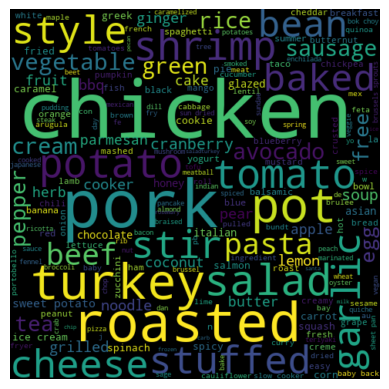

In [11]:
plot_wordcloud_from_string('name')

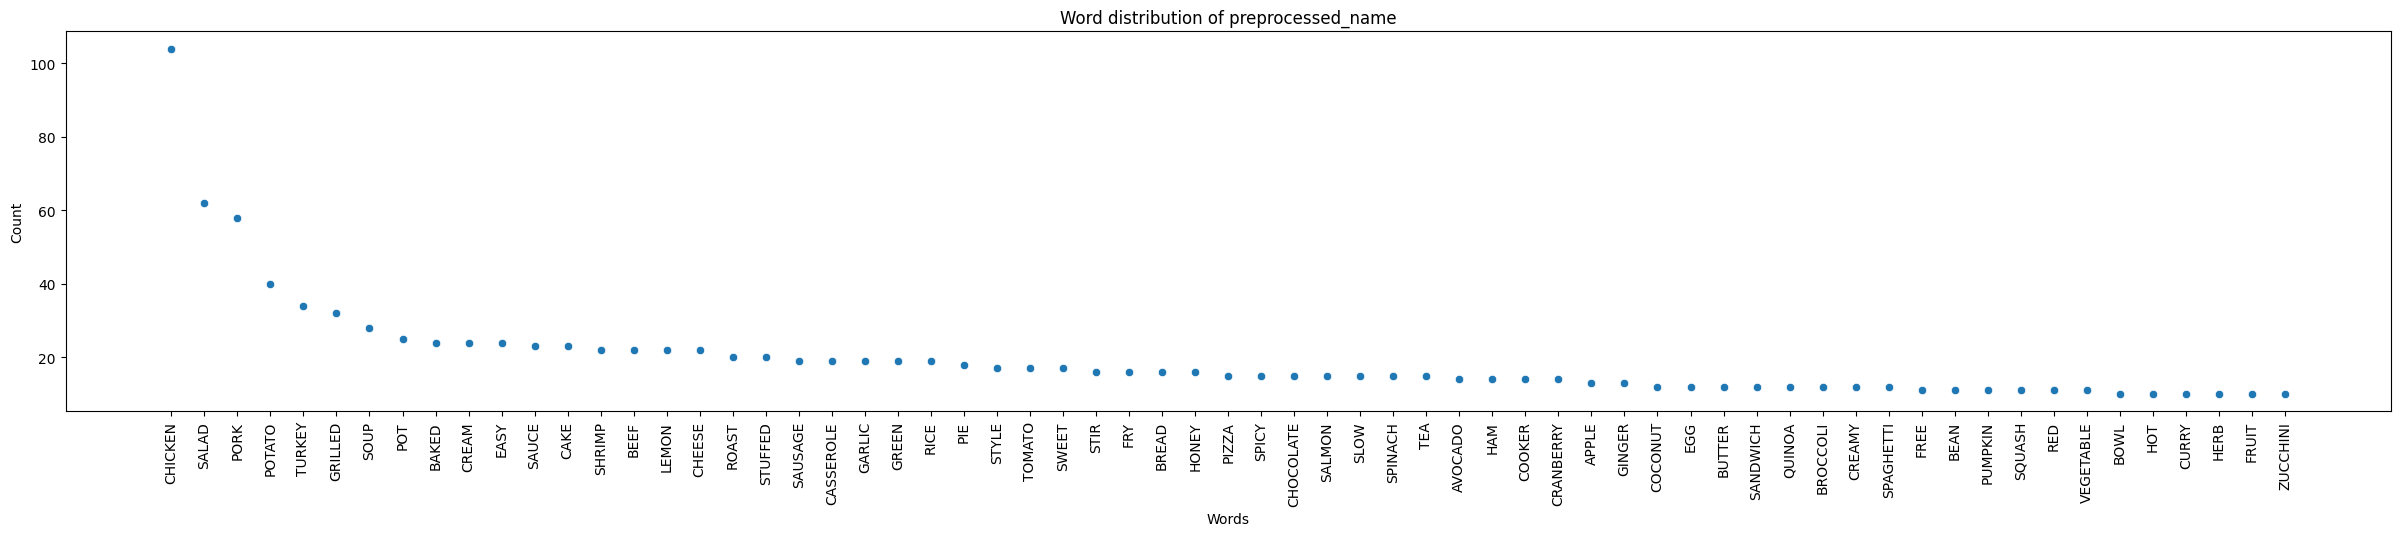

In [12]:
plot_distribution('preprocessed_name', 10)

### Description
- Similar to the `name` feature, in the `description` there is also a high occurrence of **chicken**.
- Not very surprising, all forms of **recip** are on place one.
- There is also a mixture of word types again (e.g. the occurrence of **make**)

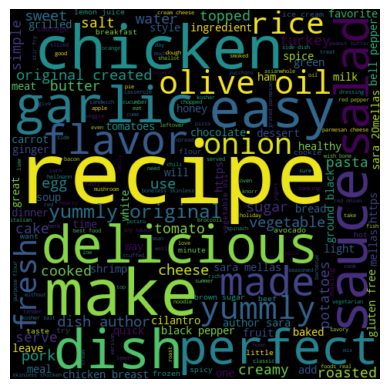

In [13]:
plot_wordcloud_from_string('description')

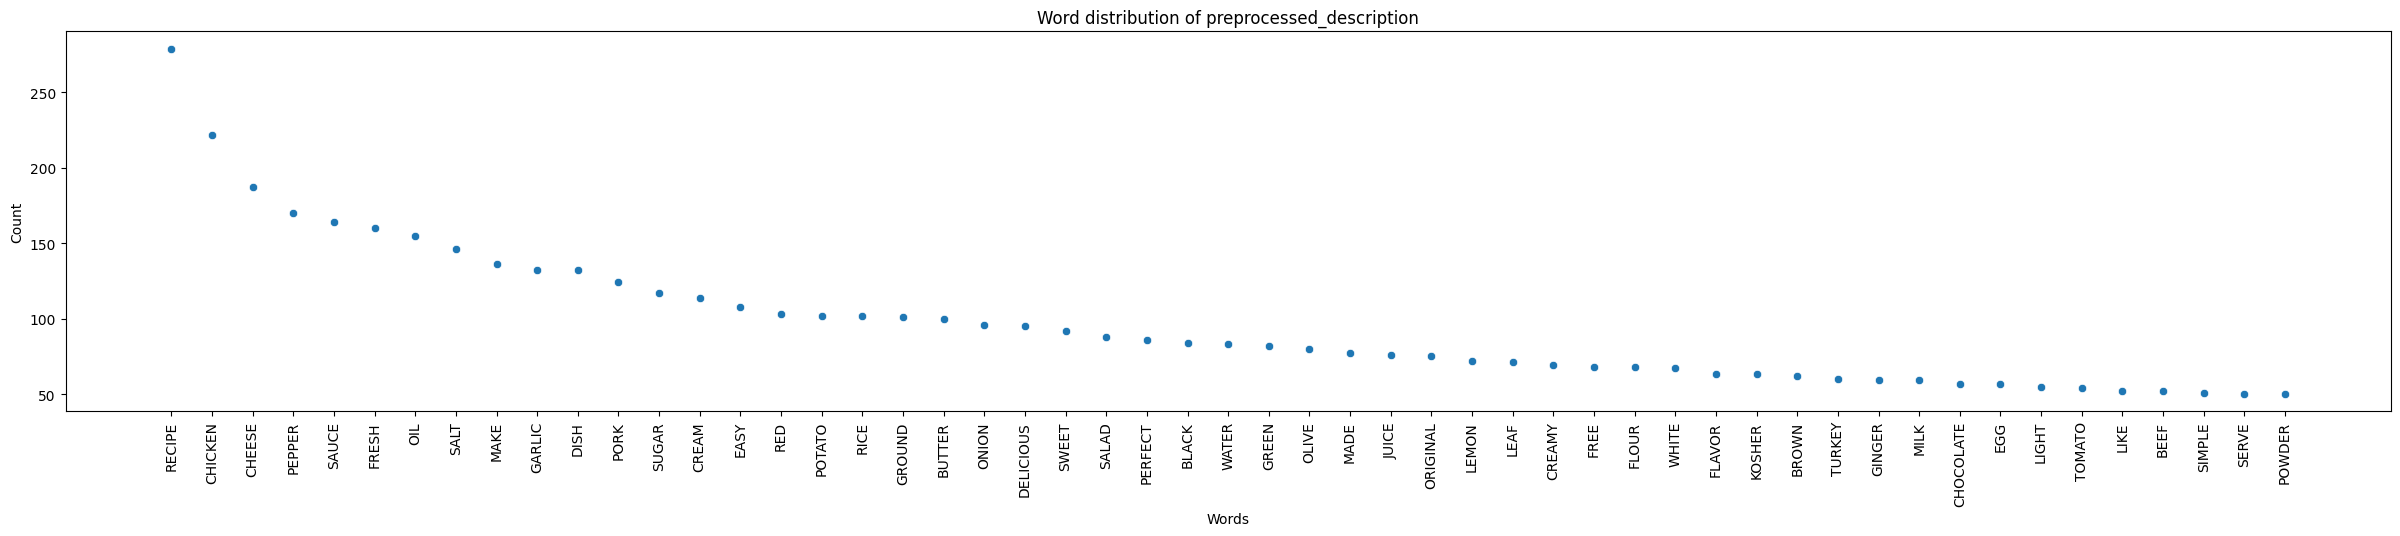

In [14]:
plot_distribution('preprocessed_description', 50)

### Ingredients
- The first thing to notice is that there is a mixture of ingredients and the unit of measurement that is used. (**cup**, **teaspoon** and **tablespoon** being on top or also **gram**, **ounc**)
- There are some ingredients that occure in almost every recipe (**salt**, **pepper**, **oil**)
- Descriptive words should be grouped with other words (`n_grams`), e.g. (**none**, **black**)

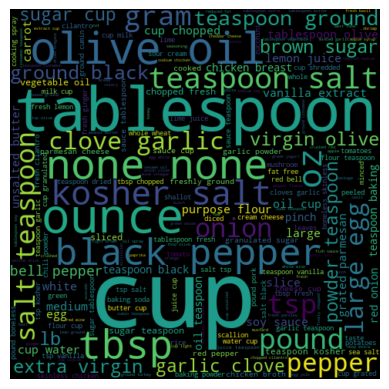

In [15]:
plot_wordcloud_from_string('ingredients')

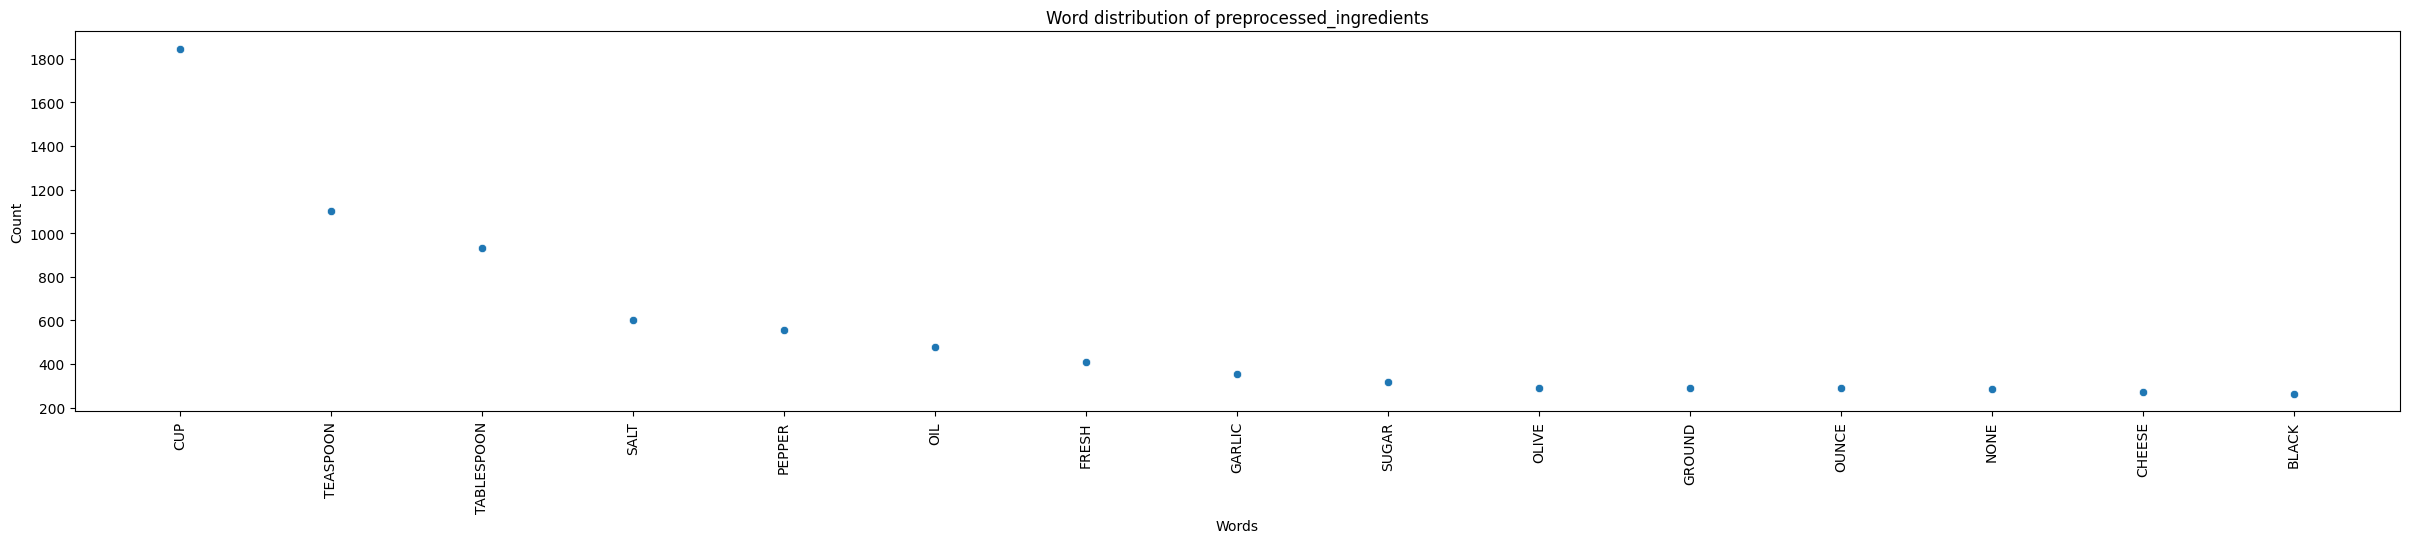

In [16]:
plot_distribution('preprocessed_ingredients', 250)

### Steps
- There is a mixture of steps (verbs like **add**, **heat**, **cook**) and ingredients (nouns like **oil**, **water**, **sauce**)
- In the steps there are often additional common ingrediens that are not in the list of ingredients like **water**.
- There seems to be a group of words that describe tools that are required to cook like **oven**, **bowl**, **pan**.

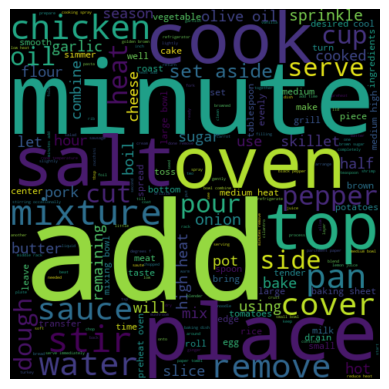

In [17]:
plot_wordcloud_from_string('steps')

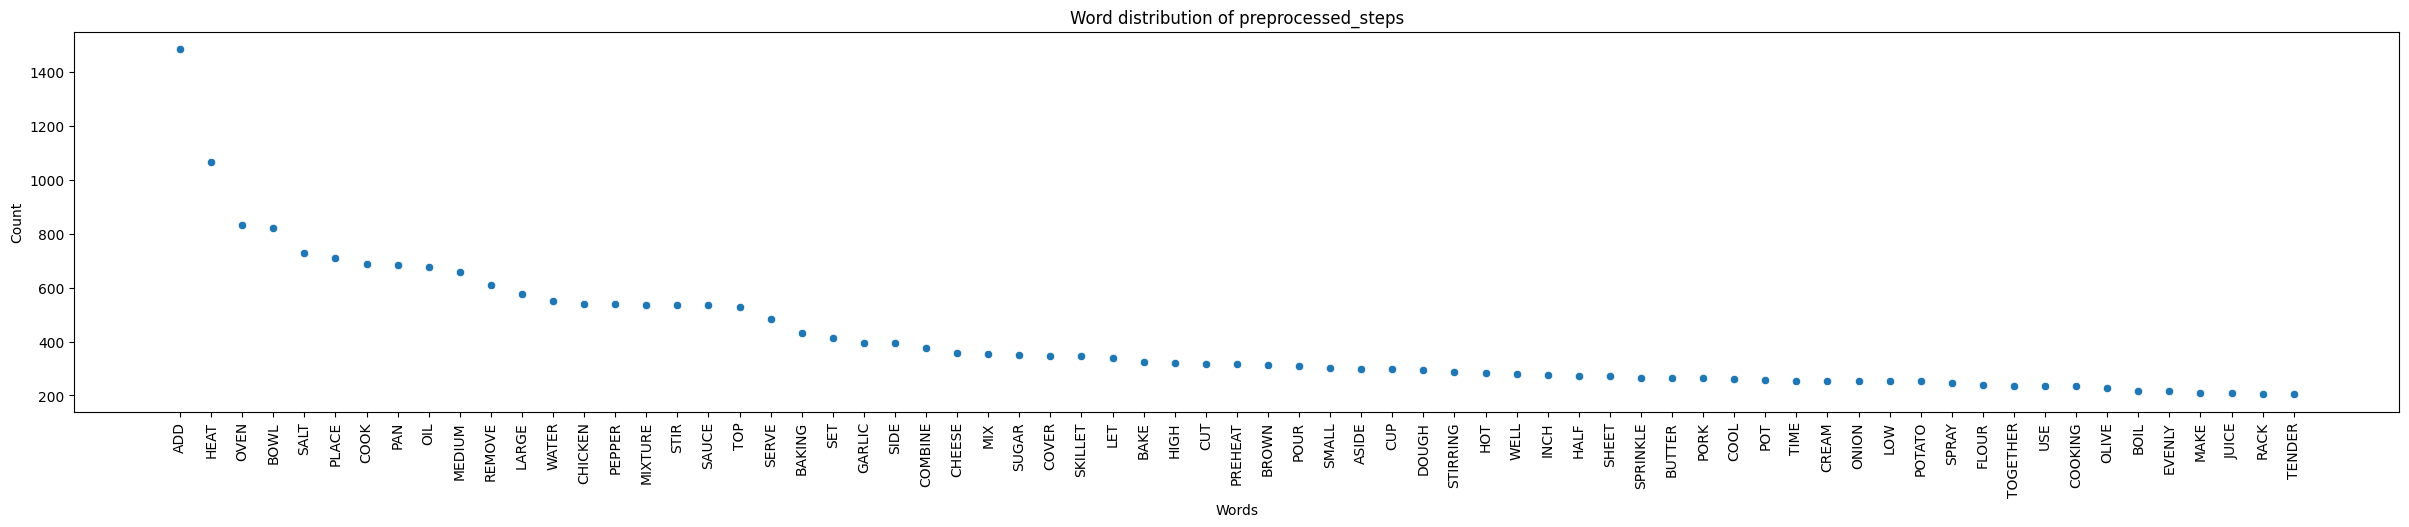

In [18]:
plot_distribution('preprocessed_steps', 200)

In [19]:
def plot_tag_distribution(column_name, keep_count):
    word_counts = Counter()
    for sublist in df[column_name]:
        for word in sublist:
            word_counts[word] += 1

    name_dict = dict(word_counts)
    sorted_dict = dict(sorted(name_dict.items(), key=lambda x: x[1], reverse=True))
    stripped_sorted_dict =  {k: v for k, v in sorted_dict.items() if v >= keep_count}

    stripped_sorted_tag_dict = [key[1] for key in stripped_sorted_dict.keys()]
    stripped_sorted_tag_dict

    tag_counts = Counter()
    for word in stripped_sorted_tag_dict:
        tag_counts[word] += 1

    return tag_counts

# POS

### Name

Counter({'NN': 469, 'JJ': 144, 'NNS': 31, 'RB': 26, 'VBD': 24, 'VBN': 20, 'VB': 20, 'IN': 14, 'VBP': 13, 'VBG': 12, 'CD': 6, 'CC': 5, 'DT': 5, 'PRP': 4, 'VBZ': 4, 'JJR': 3, 'WRB': 2, 'PRP$': 2, 'RP': 2, 'TO': 1, 'NNP': 1, 'RBR': 1, 'MD': 1, 'JJS': 1, 'FW': 1})


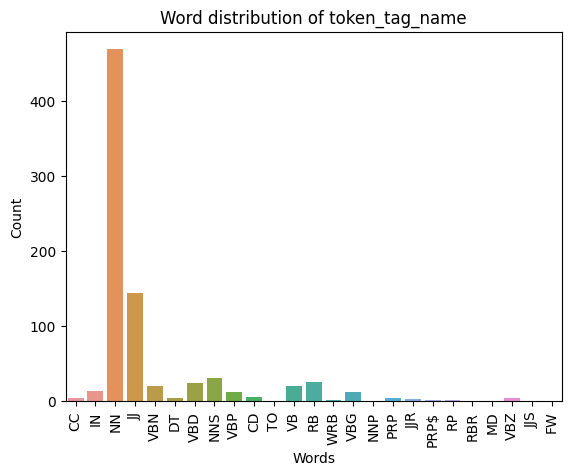

In [20]:
tag_counts = plot_tag_distribution('token_tag_name', 0)
print(tag_counts)

sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()))
plt.title(f"Word distribution of token_tag_name")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=10)

plt.show()

### Description

Counter({'NN': 1258, 'JJ': 638, 'VB': 281, 'RB': 185, 'VBP': 156, 'VBD': 125, 'NNS': 113, 'VBN': 110, 'VBG': 106, 'IN': 77, 'VBZ': 51, 'JJR': 24, 'DT': 17, 'PRP': 16, 'CC': 9, 'PRP$': 8, 'MD': 8, 'RP': 7, 'CD': 7, 'RBR': 7, 'WRB': 5, 'JJS': 5, 'FW': 5, 'WDT': 4, 'NNP': 4, 'PDT': 3, 'WP': 3, 'TO': 2, 'RBS': 2, 'EX': 1, 'WP$': 1, 'UH': 1})


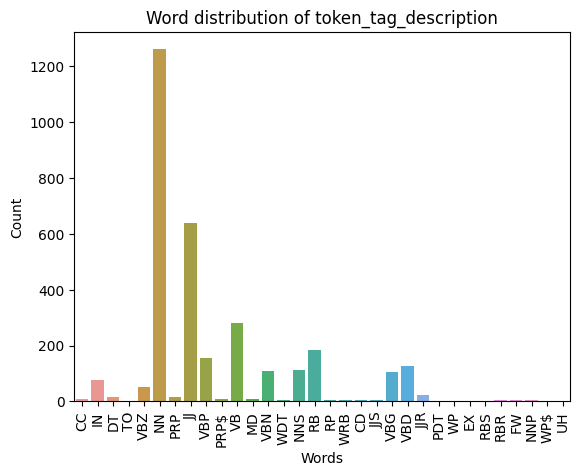

In [21]:
tag_counts = plot_tag_distribution('token_tag_description', 0)
print(tag_counts)

sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()))
plt.title(f"Word distribution of token_tag_description")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=10)

plt.show()

### Ingredients

Counter({'NN': 626, 'JJ': 372, 'VBD': 94, 'VBP': 77, 'VB': 71, 'RB': 54, 'NNS': 48, 'VBN': 41, 'IN': 32, 'VBG': 26, 'VBZ': 25, 'JJR': 11, 'CC': 7, 'DT': 7, 'FW': 7, 'RBR': 5, 'CD': 4, 'PRP$': 3, 'RP': 3, 'PRP': 3, 'MD': 2, 'JJS': 2, 'NNP': 2, 'WDT': 2, 'TO': 1, "''": 1, 'RBS': 1})


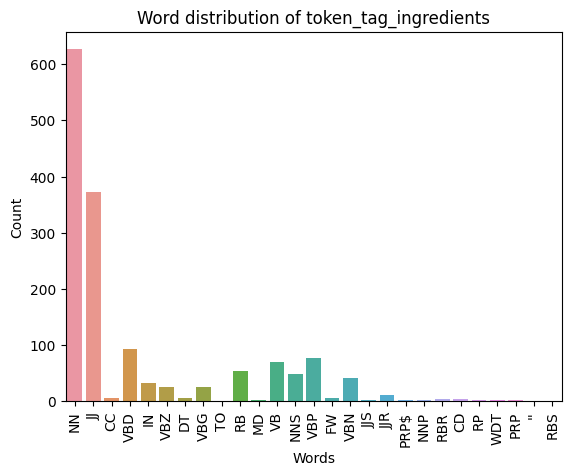

In [22]:
tag_counts = plot_tag_distribution('token_tag_ingredients', 0)
print(tag_counts)

sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()))
plt.title(f"Word distribution of token_tag_ingredients")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=10)

plt.show()

### Steps

Counter({'NN': 1596, 'JJ': 985, 'VB': 622, 'VBP': 311, 'RB': 284, 'VBD': 224, 'VBN': 216, 'VBG': 199, 'NNS': 171, 'VBZ': 153, 'IN': 144, 'JJR': 42, 'FW': 40, 'PDT': 31, 'RP': 20, 'DT': 18, 'RBR': 15, 'PRP': 13, 'CD': 12, 'MD': 11, 'JJS': 10, 'CC': 9, 'NNP': 7, 'PRP$': 6, 'WRB': 5, 'WDT': 4, 'EX': 4, 'RBS': 3, 'WP': 3, 'TO': 1})


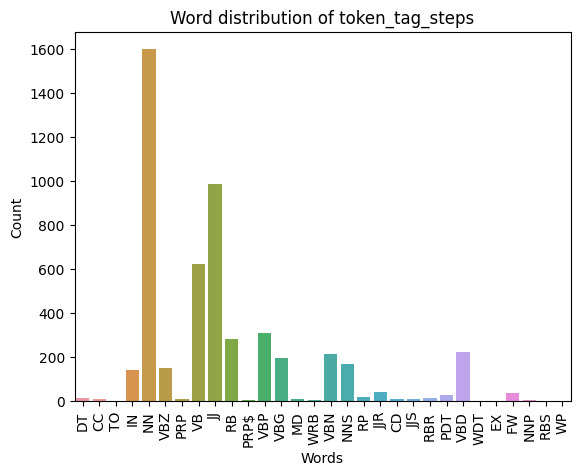

In [23]:
tag_counts = plot_tag_distribution('token_tag_steps', 0)
print(tag_counts)

sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()))
plt.title(f"Word distribution of token_tag_steps")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=10)

plt.show()

## Stopwords

In [24]:
df_custom_stopwords = pd.read_pickle(file_path_stopwords)

counter = Counter()
for row in df_custom_stopwords['preprocessed_content']:
    for word in row:
        counter[word] += 1

domain_stopwords = []
for word, count in counter.most_common(25):
  domain_stopwords.append(word)

In [25]:
# Manual stopword lists
custom_stopwords = [ 'TABLESPOON', 'NONE', 'FRESH', 'GRAM', 'GROUND', 'POUND', 'POWDER', 'CHOPPED', 'RED', 'MEDIUM', 'VIRGIN', 'SPRAY', 'PINCH', 'BONELESS', 
                       'SLICE', 'SKINLESS', 'MILLILITER', 'BABY', 'PACKAGE', 'BAG', 'MIX', 'BUNCH', 'INCH', 'SWEET', 'EXTRACT', 'PURE', 'HEAD', 'CUT', 'JAR', 'SPREAD', 'SQUASH', 
                       'PLAIN', 'KOSHER' ]

custom_additional_stopwords = [ 'REMOVE', 'LET', 'BE', 'SET', 'F', 'ADD', 'MAKE', 'SEE', 'TAKE', 'CONTINUE', 'BRING', 'COOK', 'GET', 'MAKE', 'KEEP', 'YES',
                               'SALT', 'PEPPER', 'OIL', 'WATER', 'ONION', 'OLIVE', 'SUGAR', 'BUTTER', 'SAUCE', 'JUICE', 'CREAM', 'LARGE', 'BLACK', 'WHITE', 'GREEN', 'BROWN', 'WHOLE', 'PURPOSE', 'FREE', 'DRIED', 'FAT', 'SLICED', 'BAKING', 'UNSALTED', 'FROZEN', 'CRUSHED', 'TASTE', 'BELL', 
                               'LIGHT', 'EXTRA', 'YELLOW', 'GRANULATED', 'ORANGE', 'BEST', 'REDUCED', 'HOT', 'DRY', 'LOW', 'HALF', 'WISH', 'THIN', 'SHARP', 'DARK', 'HANDFUL', 'HEAVY', 'REAL', 'DRAINED', 'CANT', 'BELIEVE', 'SMALL', 'LEFTOVER', 'CUBE', 'OPTIONAL', 'STYLE', 'BEATEN', 'CANNED',
                               'CONDENSED', 'POWDERED', 'FRESHLY', 'PEELED', 'BAY', 'SEA', 'FINELY', 'DIVIDED', 'SMOKED', 'NATURAL', 'LEAF' ]

# Calculated stopword list
domain_stopwords.extend(custom_stopwords)
domain_stopwords.extend(custom_additional_stopwords)

In [26]:
domain_stopwords

['U',
 'FLUID',
 'CUP',
 'VOLUME',
 'METRIC',
 'IMPERIAL',
 'WEIGHT',
 'USED',
 'MEASURING',
 'PINT',
 'COOKING',
 'SYSTEM',
 'FOOD',
 'WATER',
 'MEASURE',
 'TEASPOON',
 'MEASURED',
 'GALLON',
 'SIZE',
 'OUNCE',
 'MEASUREMENT',
 'DEFINED',
 'USE',
 'INGREDIENT',
 'P',
 'TABLESPOON',
 'NONE',
 'FRESH',
 'GRAM',
 'GROUND',
 'POUND',
 'POWDER',
 'CHOPPED',
 'RED',
 'MEDIUM',
 'VIRGIN',
 'SPRAY',
 'PINCH',
 'BONELESS',
 'SLICE',
 'SKINLESS',
 'MILLILITER',
 'BABY',
 'PACKAGE',
 'BAG',
 'MIX',
 'BUNCH',
 'INCH',
 'SWEET',
 'EXTRACT',
 'PURE',
 'HEAD',
 'CUT',
 'JAR',
 'SPREAD',
 'SQUASH',
 'PLAIN',
 'KOSHER',
 'REMOVE',
 'LET',
 'BE',
 'SET',
 'F',
 'ADD',
 'MAKE',
 'SEE',
 'TAKE',
 'CONTINUE',
 'BRING',
 'COOK',
 'GET',
 'MAKE',
 'KEEP',
 'YES',
 'SALT',
 'PEPPER',
 'OIL',
 'WATER',
 'ONION',
 'OLIVE',
 'SUGAR',
 'BUTTER',
 'SAUCE',
 'JUICE',
 'CREAM',
 'LARGE',
 'BLACK',
 'WHITE',
 'GREEN',
 'BROWN',
 'WHOLE',
 'PURPOSE',
 'FREE',
 'DRIED',
 'FAT',
 'SLICED',
 'BAKING',
 'UNSALTED',
 'FRO

## Calculations

### Functions

In [27]:
def word_counter(list):
    words_count = Counter()
    for word in list:
        words_count[word] += 1
    
    return words_count

In [28]:
def count_words(column, tags, ignore_tokens = []):
    filtered_list = []
    for row in df[column]:
        filtered_item = [item for item in row if item[1] in tags and item[0] not in ignore_tokens]
        if (filtered_item):
            filtered_list.append(filtered_item)

    word_count = Counter()
    for row in filtered_list:
        for tag in row:
            word_count[tag[0]] += 1

    return word_count

In [29]:
def count_combination(column, tags, ignore_tokens = []):
    filtered_list = []
    for row in df[column]:
        filtered_item = [item[0] for item in row if item[1] in tags and item[0] not in ignore_tokens]
        if (filtered_item):
            combinations = list(itertools.combinations(list(set(filtered_item)), 2))
            filtered_list.append(combinations)

    # flatten list
    combinations_flat = [item for sublist in filtered_list for item in sublist]
    return word_counter(combinations_flat)

In [30]:
def count_words_ngram(column, tags, ngram, ignore_tokens = []):
    filtered_list = []
    for row in df[column]:
        filtered_item = [item[0] for item in row if item[1] in tags and item[0] not in ignore_tokens]
        if (filtered_item):
            grams = ngrams(filtered_item, ngram)
            filtered_list.append(list(grams))

    ngrams_list = []
    for entry in filtered_list:
        for subentry in entry:
            ngrams_list.append(subentry)
            
    return word_counter(ngrams_list)

In [31]:
def count_combination_ngram(column, tags, ngram, ignore_tokens = []):
    filtered_list = []
    for row in df[column]:
        filtered_item = [item[0] for item in row if item[1] in tags and item[0] not in ignore_tokens]
        if (filtered_item):
            grams = list(set(ngrams(filtered_item, ngram)))
            combinations = list(itertools.combinations(grams, 2))
            filtered_list.append(combinations)

    # flatten list
    combinations_flat = [item for sublist in filtered_list for item in sublist]
    return word_counter(combinations_flat)

In [32]:
POSITIVE_FLAG = 'Stopwords'
NEGATIVE_FLAG = 'Clean'

In [33]:
def add_flag_if_special(counter, special_elements):
    if isinstance(special_elements, str):
        special_elements = [special_elements]

    for element, count in counter.items():
        if isinstance(element, str):
            flag =  POSITIVE_FLAG if element in special_elements else NEGATIVE_FLAG
        else:
            flag = POSITIVE_FLAG if any(el in special_elements for el in element) else NEGATIVE_FLAG
        counter[element] = (count, flag)

    return counter

In [34]:
def add_flag_if_special_list(counter, special_elements):
    if isinstance(special_elements, str):
        special_elements = [special_elements]

    for element, count in counter.items():
        for el in element:
            flag = POSITIVE_FLAG if any(el in special_elements for el in el) else NEGATIVE_FLAG
            counter[element] = (count, flag)

    return counter

In [35]:
def filter_list(counter, top):
    filtered_elements = []
    for word, (count, flag) in counter.most_common():
        if flag != 1:
            filtered_elements.append((word, count, flag))
        if len(filtered_elements) == top:
            break

    return filtered_elements

### a) Absolute number of ingredients within all recipes &
### b) Relative number of different ingredients within all recipes - (Absolute number of different ingredients / Absolute number of ingredients)

In [36]:
df_temp = df[:9999]

In [37]:
for row in df_temp['preprocessed_ingredients']:
    print([word for word in row if word not in domain_stopwords])

['AVOCADO', 'LUMP', 'CRAB', 'MEAT', 'LIME', 'GRAPE', 'LETTUCE']
['CHICKEN', 'SAUSAGE', 'GARLIC', 'PETITE', 'SEASONING', 'THYME', 'CHEESE', 'UNCOOKED', 'WHEAT', 'GLUTEN']
['PORK', 'TENDERLOIN', 'VEGETABLE', 'POTATO', 'CORNSTARCH', 'WINE']
['SPIRAL', 'BONE', 'HAM', 'MUSTARD', 'SALTED', 'HONEY', 'GARLIC', 'PAPRIKA']
['BROWNIE', 'SKIPPY', 'CREAMY', 'PEANUT', 'QUART', 'VANILLA', 'ICE', 'CHOCOLATE', 'SYRUP']
['JUMBO', 'SHRIMP', 'GARLIC', 'COCONUT', 'MILK', 'LIME']
['PORK', 'CINNAMON', 'APPLE', 'APPLE']
['CHICKEN', 'WINE', 'ORGANIC', 'BASIL', 'GARLIC', 'ROSEMARY']
['UNBLEMISHED', 'FLAVOR', 'APPLE', 'PULP', 'LEMON', 'SWEETENER', 'MAPLE', 'SYRUP', 'HONEY', 'CINNAMON', 'NUTMEG', 'GINGER', 'PUMPKIN', 'PIE', 'BLEND']
['LEMON', 'SHEET', 'PUFF', 'PASTRY', 'CINNAMON', 'EGG']
['PORK', 'SHOULDER', 'CUMIN', 'CORN', 'SOUR']
['CELERY', 'PARSLEY', 'CLOVE', 'GARLIC', 'CORN', 'STARCH', 'SODIUM', 'CHICKEN', 'TURKEY', 'BROTH', 'TURKEY', 'BREAST', 'THYME', 'EGG']
[]
['COUNTRY', 'PORK', 'WINE', 'VINEGAR']
['TURK

In [38]:
counter = Counter()
for row in df_temp['preprocessed_ingredients']:
    for word in row:
        counter[word] += 1

counter = add_flag_if_special(counter, domain_stopwords)

sorted_list = sorted(counter.items(), key=lambda x: x[1][0], reverse=True)
output_list = [(name, count) for name, (count, flag) in sorted_list if flag in [NEGATIVE_FLAG]]
print(output_list)

full_count = sum(count for _, (count, flag) in counter.items())
absolute_ingredients_count = sum(count for _, (count, flag) in counter.items() if flag in [NEGATIVE_FLAG])
print(f'Absolte number of (all) ingredients: {full_count} (for reference)')
print('---')
print(f'Absolte number of (real) ingredients: {absolute_ingredients_count}')

distinct_ingredients_count = sum(1 for _, (count, flag) in counter.items() if flag in [NEGATIVE_FLAG])
print(f'Distinct count of (real) ingredients: {distinct_ingredients_count}')

relative_ingredients = distinct_ingredients_count / absolute_ingredients_count
print(f'Relative number of different ingredients: {round(relative_ingredients, 4)} (or {round(relative_ingredients * 100, 2)}%)')

df_a = pd.DataFrame(columns=['value'], data=[absolute_ingredients_count, distinct_ingredients_count, round(relative_ingredients, 4)], index=['absolute', 'distinct', 'relative'])
df_a.to_csv('tableau/a+b.csv')

[('GARLIC', 356), ('CHEESE', 272), ('CHICKEN', 207), ('FLOUR', 180), ('LEMON', 146), ('MILK', 142), ('CLOVE', 134), ('VANILLA', 132), ('EGG', 122), ('PORK', 103), ('GINGER', 103), ('VINEGAR', 81), ('CINNAMON', 80), ('POTATO', 79), ('TOMATO', 79), ('SOY', 79), ('LIME', 78), ('VEGETABLE', 77), ('RICE', 75), ('BROTH', 73), ('CHILI', 68), ('HONEY', 64), ('CHOCOLATE', 64), ('CUMIN', 64), ('PARSLEY', 63), ('CORN', 62), ('BEEF', 61), ('COCONUT', 60), ('WINE', 59), ('BASIL', 58), ('PAPRIKA', 55), ('THYME', 51), ('TURKEY', 48), ('SODIUM', 46), ('SESAME', 45), ('SYRUP', 42), ('SOUR', 42), ('MUSTARD', 41), ('MAYONNAISE', 41), ('SODA', 40), ('BREAD', 40), ('BREAST', 39), ('CAYENNE', 39), ('SEASONING', 38), ('ICE', 36), ('WHEAT', 35), ('CELERY', 35), ('MINT', 34), ('LEAN', 34), ('LETTUCE', 33), ('PASTE', 32), ('SPINACH', 32), ('BONE', 31), ('AVOCADO', 30), ('CORNSTARCH', 30), ('DRESSING', 30), ('PEANUT', 29), ('ROSEMARY', 29), ('NUTMEG', 29), ('STOCK', 29), ('CORIANDER', 29), ('UNSWEETENED', 28), (

In [39]:
data = dict(counter)
df_a_items = pd.DataFrame.from_dict(data, orient='index', columns=['Count', 'Flag'])
df_a_items.to_pickle('../../data/processed/df_with_filter.pkl')

In [40]:
df_a_items[df_a_items['Flag'] == NEGATIVE_FLAG].to_pickle('../../data/processed/df_filered_stopwords.pkl')

### c) Top 10 most frequent food preparation steps (verbs, single tokens)


In [41]:
counter = count_words('token_tag_steps', ['VB'])
counter = add_flag_if_special(counter, domain_stopwords)

print('Top 10 most frequent food preparation steps in filtered list:')
for word, count, flag in filter_list(counter, 10):
    print(f'{word} ({count}) - {flag}')

data = [{'Name': key, 'Count': count, 'Flag': flag} for key, (count, flag) in counter.items()]
pd.DataFrame(data).to_csv('tableau/c.csv')

Top 10 most frequent food preparation steps in filtered list:
ADD (598) - Stopwords
REMOVE (333) - Stopwords
LET (231) - Stopwords
BE (215) - Stopwords
COOK (173) - Stopwords
SERVE (162) - Clean
MAKE (155) - Stopwords
REDUCE (143) - Clean
SET (129) - Stopwords
COOL (128) - Clean


### d) Top 10 most frequent food preparation step combinations (verbs, single tokens)

In [42]:
counter = count_combination('token_tag_steps', ['VB'])
counter = add_flag_if_special(counter, domain_stopwords)

print('Top 10 most frequent food preparation step combinations in filtered list (single tokens):')
for word, count, flag in filter_list(counter, 10):
    print(f'{word} ({count}) - {flag}')

data = [{'Name': key, 'Count': count, 'Flag': flag} for key, (count, flag) in counter.items()]
pd.DataFrame(data).to_csv('tableau/d.csv')

Top 10 most frequent food preparation step combinations in filtered list (single tokens):
('COOK', 'ADD') (85) - Stopwords
('REMOVE', 'ADD') (72) - Stopwords
('REMOVE', 'LET') (63) - Stopwords
('MAKE', 'ADD') (58) - Stopwords
('ADD', 'SERVE') (57) - Stopwords
('SET', 'ADD') (57) - Stopwords
('CUT', 'ADD') (56) - Stopwords
('REMOVE', 'SERVE') (54) - Stopwords
('COOK', 'REMOVE') (52) - Stopwords
('ADD', 'LET') (50) - Stopwords


### e) Top 10 most frequent ingredients (nouns, single tokens and 2-grams)


In [43]:
counter = count_words('token_tag_ingredients', ['NN'])
counter = add_flag_if_special(counter, domain_stopwords)

print('Top 10 most frequent ingredients in filtered list (single token):')
for word, count, flag in filter_list(counter, 10):
    print(f'{word} ({count}) - {flag}')

data = [{'Name': key, 'Count': count, 'Flag': flag} for key, (count, flag) in counter.items()]
pd.DataFrame(data).to_csv('tableau/e_token.csv')


Top 10 most frequent ingredients in filtered list (single token):
CUP (1626) - Stopwords
TEASPOON (1066) - Stopwords
TABLESPOON (893) - Stopwords
SALT (552) - Stopwords
OIL (477) - Stopwords
PEPPER (398) - Stopwords
OUNCE (289) - Stopwords
NONE (287) - Stopwords
GROUND (255) - Stopwords
ONION (239) - Stopwords


In [44]:
counter = count_words_ngram('token_tag_ingredients', ['NN'], 2)
counter = add_flag_if_special(counter, domain_stopwords)

print('Top 10 most frequent ingredients in filtered list (2-grams):')
for word, count, flag in filter_list(counter, 10):
    print(f'{word} ({count}) - {flag}')

data = [{'Name': key, 'Count': count, 'Flag': flag} for key, (count, flag) in counter.items()]
pd.DataFrame(data).to_csv('tableau/e_grams.csv')

Top 10 most frequent ingredients in filtered list (2-grams):
('NONE', 'NONE') (260) - Stopwords
('CUP', 'CUP') (193) - Stopwords
('TEASPOON', 'SALT') (150) - Stopwords
('KOSHER', 'SALT') (136) - Stopwords
('SALT', 'PEPPER') (121) - Stopwords
('SALT', 'TEASPOON') (118) - Stopwords
('TABLESPOON', 'OIL') (114) - Stopwords
('TEASPOON', 'GROUND') (108) - Stopwords
('TEASPOON', 'PEPPER') (96) - Stopwords
('CUP', 'WATER') (86) - Stopwords


### f) Top 10 most frequent ingredient combinations (nouns, single tokens and 2-grams)

In [45]:
counter = count_combination('token_tag_ingredients', ['NN'])
counter = add_flag_if_special(counter, domain_stopwords)

print('Top 10 most frequent ingredient combinations in filtered list:')
for word, count, flag in filter_list(counter, 10):
    print(f'{word} ({count}) - {flag}')

data = [{'Name': key, 'Count': count, 'Flag': flag} for key, (count, flag) in counter.items()]
pd.DataFrame(data).to_csv('tableau/f_token.csv')

Top 10 most frequent ingredient combinations in filtered list:
('SALT', 'CUP') (336) - Stopwords
('TEASPOON', 'CUP') (330) - Stopwords
('TABLESPOON', 'CUP') (320) - Stopwords
('TEASPOON', 'TABLESPOON') (284) - Stopwords
('OIL', 'CUP') (272) - Stopwords
('TEASPOON', 'SALT') (250) - Stopwords
('SALT', 'OIL') (237) - Stopwords
('SALT', 'PEPPER') (222) - Stopwords
('TABLESPOON', 'SALT') (213) - Stopwords
('TEASPOON', 'OIL') (211) - Stopwords


In [46]:
counter = count_combination_ngram('token_tag_ingredients', ['NN'], 2)
counter = add_flag_if_special_list(counter, domain_stopwords)

print('Top 10 most frequent ingredient combinations in filtered list (2-grams):')
for word, count, flag in filter_list(counter, 10):
    print(f'{word} ({count}) - {flag}')

data = [{'Name': key, 'Count': count, 'Flag': flag} for key, (count, flag) in counter.items()]
pd.DataFrame(data).to_csv('tableau/f_grams.csv')

Top 10 most frequent ingredient combinations in filtered list (2-grams):
(('SALT', 'TEASPOON'), ('TEASPOON', 'PEPPER')) (60) - Stopwords
(('TEASPOON', 'SALT'), ('TEASPOON', 'PEPPER')) (50) - Stopwords
(('TEASPOON', 'SALT'), ('SALT', 'TEASPOON')) (39) - Stopwords
(('SALT', 'TEASPOON'), ('TEASPOON', 'SALT')) (35) - Stopwords
(('TEASPOON', 'SALT'), ('CUP', 'CUP')) (35) - Stopwords
(('TEASPOON', 'SALT'), ('TEASPOON', 'POWDER')) (35) - Stopwords
(('KOSHER', 'SALT'), ('SALT', 'PEPPER')) (32) - Stopwords
(('TEASPOON', 'SALT'), ('TEASPOON', 'TEASPOON')) (30) - Stopwords
(('TEASPOON', 'SALT'), ('CUP', 'TEASPOON')) (30) - Stopwords
(('SALT', 'TEASPOON'), ('TEASPOON', 'GROUND')) (30) - Stopwords


## Appendix

#### NGRAMS

This is not being used as ingredients can be tagged differently in different recipes.

In [47]:
ingredients_tagged = df['token_tag_ingredients']
# flatten list
ingredients_tagged = [item for sublist in ingredients_tagged for item in sublist]
# filter for nouns and proper nouns
ingredients_tagged = [item for item in ingredients_tagged if item[1] == "NN"]
# extract only the words
ingredients_tagged = [item[0] for item in ingredients_tagged]
# remove duplicates
ingredients_tagged = list(set(ingredients_tagged))
ingredients_tagged

['SPLIT',
 'MATZO',
 'STEEL',
 'HOMEMADE',
 'VODKA',
 'SWEET',
 'BEATEN',
 'HEAT',
 'SAUERKRAUT',
 'STRAW',
 'COOKING',
 'PULP',
 'SPICE',
 'BEDTIME',
 'CUCUMBER',
 'CARROT',
 'STOCK',
 'JUMBO',
 'AID',
 'INCH',
 'BAR',
 'JACK',
 'YORK',
 'LENGTHWISE',
 'PASSION',
 'COUNTRY',
 'HALF',
 'RUMP',
 'EQUIPMENT',
 'LEMON',
 'SHOT',
 'BLOOD',
 'SELF',
 'HONEY',
 'CREAM',
 'HALIBUT',
 'GREY',
 'BREAKFAST',
 'TARTAR',
 'BAMBOO',
 'BALL',
 'GARNISH',
 'WEDGE',
 'TAPIOCA',
 'SUN',
 'OIL',
 'GRANNY',
 'MARINADE',
 'CHEF',
 'BONELESS',
 'WASABI',
 'DAIRY',
 'BARILLA',
 'BOTTLE',
 'BRINE',
 'FOSTER',
 'TEA',
 'SPICY',
 'BAG',
 'CHAMPAGNE',
 'PORK',
 'SMOKE',
 'PROCESS',
 'MUSTARD',
 'WATER',
 'CLAM',
 'SEASONING',
 'CHILE',
 'BIBB',
 'BOUILLON',
 'INSTANT',
 'EQUILIBRIUM',
 'GUAVA',
 'MINIATURE',
 'GALA',
 'TROUT',
 'CONSISTENCY',
 'SUBMARINE',
 'WORK',
 'TYPE',
 'COCKTAIL',
 'SPRIG',
 'TURMERIC',
 'REDUCTION',
 'PASTRY',
 'SCOOP',
 'BABY',
 'PLANTAIN',
 'STAR',
 'PACKET',
 'CASTER',
 'HEATH',
 'DES

In [48]:
ingredients_tagged = df['token_tag_ingredients']
ingredients_tagged = [item for sublist in ingredients_tagged for item in sublist]
# print out all where the first el is "OIL"
for item in ingredients_tagged:
    if item[0] == "OIL":
        print(item)

('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL', 'NN')
('OIL'

## Generate stopword from webpage 

In [49]:
df_custom_stopwords = pd.read_pickle(file_path_stopwords)
df_custom_stopwords

,content,preprocessed_content,token_tag_content
0,Cooking weights and measures - Wikipedia,[COOKING],"[(COOKING, NN), (AND, CC)]"
1,Jump to content,"[JUMP, CONTENT]","[(JUMP, NN), (TO, TO), (CONTENT, VB)]"
2,Main menu,"[MAIN, MENU]","[(MAIN, JJ), (MENU, NN)]"
3,Main menu,"[MAIN, MENU]","[(MAIN, JJ), (MENU, NN)]"
4,move to sidebar,[MOVE],"[(MOVE, NN), (TO, TO)]"
...,...,...,...
960,Mobile view,"[MOBILE, VIEW]","[(MOBILE, JJ), (VIEW, NN)]"
961,Developers,[],[]
962,Statistics,[STATISTIC],"[(STATISTICS, NNS)]"
963,Cookie statement,[STATEMENT],"[(STATEMENT, NN)]"


In [50]:
word_count = Counter()
for row in df_custom_stopwords['preprocessed_content']:
    for word in row:
        word_count[word] += 1

for word, count in word_count.most_common(100):
  print(f'{word} ({count})')

U (34)
FLUID (31)
CUP (29)
VOLUME (25)
METRIC (24)
IMPERIAL (23)
WEIGHT (23)
USED (20)
MEASURING (19)
PINT (19)
COOKING (17)
SYSTEM (17)
FOOD (17)
WATER (17)
MEASURE (16)
TEASPOON (16)
MEASURED (15)
GALLON (15)
SIZE (14)
OUNCE (14)
MEASUREMENT (13)
DEFINED (13)
USE (12)
INGREDIENT (12)
P (12)
UNITED (11)
HISTORY (11)
COMMON (11)
FLOUR (11)
WA (11)
MAY (10)
ALSO (9)
GENERALLY (9)
TABLESPOON (9)
NEW (9)
G (8)
CANADA (8)
EVEN (8)
UNIT (8)
DRAM (8)
NOTE (8)
TIME (7)
DIFFERENT (7)
MANY (7)
SCALE (7)
RECIPE (7)
HISTORICAL (7)
CUSTOMARY (6)
HOME (6)
NORTH (6)
SUGAR (6)
ACTUAL (6)
QUART (6)
ANCIENT (6)
DEVICE (6)
LIST (6)
CONTENT (5)
LINK (5)
GENERAL (5)
COMMONLY (5)
BUTTER (5)
PINCH (5)
WORLD (5)
DRY (5)
BASED (5)
ONE (5)
SOUTH (5)
HOWEVER (5)
ACCURATE (5)
MILK (5)
BINARY (5)
SALTSPOON (5)
STANDARD (5)
EXACTLY (5)
AMOUNT (5)
BOOK (5)
NATIONAL (5)
TOGGLE (4)
TABLE (4)
COUNT (4)
INSTEAD (4)
SMALL (4)
DROP (4)
AVOIRDUPOIS (4)
FREQUENTLY (4)
DESSERTSPOON (4)
REFER (4)
LIKE (4)
SEE (4)
DEFINITION 

In [51]:
import requests
from bs4 import BeautifulSoup
import re

In [52]:
url = "https://en.wikipedia.org/wiki/Cooking_weights_and_measures"

response = requests.get(url)
if response.status_code == 200:
    content = response.text

soup = BeautifulSoup(content, 'html.parser')
text = soup.get_text()
text = re.sub(r'\t', '', text)

df_measures = pd.DataFrame(columns=['content'], data=[line for line in text.split('\n') if line.strip()])

for line in text.split('\n'):
    if line.strip():
        print(line + ' strip')
    else:
        print(line + ' no strip')

[line for line in text.split('\n') if line.strip()]

 no strip
 no strip
 no strip
 no strip
Cooking weights and measures - Wikipedia strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
Jump to content strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
 no strip
Main menu strip
 no strip
 no strip
 no strip
 no strip
 no strip
Main menu strip
move to sidebar strip
hide strip
 no strip
 no strip
 no strip
Navigation strip
 no strip
 no strip
Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate strip
 no strip
 no strip
 no strip
 no strip
Contribute strip
 no strip
 no strip
HelpLearn to editCommunity portalRecent changesUpload file strip
 no strip
 no strip
 no strip
 no 

['Cooking weights and measures - Wikipedia',
 'Jump to content',
 'Main menu',
 'Main menu',
 'move to sidebar',
 'hide',
 'Navigation',
 'Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate',
 'Contribute',
 'HelpLearn to editCommunity portalRecent changesUpload file',
 'Languages',
 'Language links are at the top of the page across from the title.',
 'Search',
 'Search',
 'Create accountLog in',
 'Personal tools',
 ' Create account Log in',
 'Pages for logged out editors learn more',
 'ContributionsTalk',
 'Contents',
 'move to sidebar',
 'hide',
 '(Top)',
 '1Metric measures',
 '2Weight of liquids',
 '3United States measures',
 'Toggle United States measures subsection',
 '3.1Approximate units',
 '4British (Imperial) measures',
 '5Special instructions',
 '6See also',
 '7Notes',
 '8References',
 '9External links',
 'Toggle the table of contents',
 'Toggle the table of contents',
 'Cooking weights and measures',
 '8 languages',
 'DeutschFrançais한국어עברית日本語Norsk

In [53]:
domain_stopwords

['U',
 'FLUID',
 'CUP',
 'VOLUME',
 'METRIC',
 'IMPERIAL',
 'WEIGHT',
 'USED',
 'MEASURING',
 'PINT',
 'COOKING',
 'SYSTEM',
 'FOOD',
 'WATER',
 'MEASURE',
 'TEASPOON',
 'MEASURED',
 'GALLON',
 'SIZE',
 'OUNCE',
 'MEASUREMENT',
 'DEFINED',
 'USE',
 'INGREDIENT',
 'P',
 'TABLESPOON',
 'NONE',
 'FRESH',
 'GRAM',
 'GROUND',
 'POUND',
 'POWDER',
 'CHOPPED',
 'RED',
 'MEDIUM',
 'VIRGIN',
 'SPRAY',
 'PINCH',
 'BONELESS',
 'SLICE',
 'SKINLESS',
 'MILLILITER',
 'BABY',
 'PACKAGE',
 'BAG',
 'MIX',
 'BUNCH',
 'INCH',
 'SWEET',
 'EXTRACT',
 'PURE',
 'HEAD',
 'CUT',
 'JAR',
 'SPREAD',
 'SQUASH',
 'PLAIN',
 'KOSHER',
 'REMOVE',
 'LET',
 'BE',
 'SET',
 'F',
 'ADD',
 'MAKE',
 'SEE',
 'TAKE',
 'CONTINUE',
 'BRING',
 'COOK',
 'GET',
 'MAKE',
 'KEEP',
 'YES',
 'SALT',
 'PEPPER',
 'OIL',
 'WATER',
 'ONION',
 'OLIVE',
 'SUGAR',
 'BUTTER',
 'SAUCE',
 'JUICE',
 'CREAM',
 'LARGE',
 'BLACK',
 'WHITE',
 'GREEN',
 'BROWN',
 'WHOLE',
 'PURPOSE',
 'FREE',
 'DRIED',
 'FAT',
 'SLICED',
 'BAKING',
 'UNSALTED',
 'FRO